In [1]:
%matplotlib inline
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

PROJECT_PATH = os.path.join("..")
sys.path.append(PROJECT_PATH)
from models.classifiers.deepHits_nans_norm_crop_stamp_model import (
    DeepHiTSNanNormCropStampModel,
)
from models.classifiers.deepHits_entopy_reg_model import DeepHiTSEntropyRegModel
from parameters import param_keys, general_keys
from modules.data_set_generic import Dataset
from scripts.plot_confusion_matrix import plot_confusion_matrix

/home/rcarrasco/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rcarrasco/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rcarrasco/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rcarrasco/anaconda3/envs/tf/lib/python3.6/s

In [2]:
# instance model and load weights

# data_path = os.path.join("../../pickles", 'training_set_with_bogus.pkl')
data_path = "../../pickles/converted_data.pkl"

n_classes = 5
params_best_so_far = {
    param_keys.DATA_PATH_TRAIN: data_path,
    param_keys.WAIT_FIRST_EPOCH: False,
    param_keys.N_INPUT_CHANNELS: 3,
    param_keys.CHANNELS_TO_USE: [0, 1, 2],
    param_keys.TRAIN_ITERATIONS_HORIZON: 30000,
    param_keys.TRAIN_HORIZON_INCREMENT: 10000,
    param_keys.TEST_SIZE: n_classes * 50,
    param_keys.VAL_SIZE: n_classes * 50,
    param_keys.NANS_TO: 0,
    param_keys.NUMBER_OF_CLASSES: n_classes,
    param_keys.CROP_SIZE: 21,
    param_keys.INPUT_IMAGE_SIZE: 21,
    param_keys.VALIDATION_MONITOR: general_keys.LOSS,
    param_keys.VALIDATION_MODE: general_keys.MIN,
    param_keys.ENTROPY_REG_BETA: None,
}

graph = tf.Graph()
sess = tf.Session(graph=graph)
with graph.as_default():
    model_best_so_far = DeepHiTSNanNormCropStampModel(params_best_so_far, session=sess)
    checkpoint_path_best_so_far = os.path.join(
        PROJECT_PATH, "results/best_model_so_far/checkpoints", "model"
    )
    model_best_so_far.load_model(checkpoint_path_best_so_far)

params_entropy = params_best_so_far.copy()
params_entropy.update({param_keys.ENTROPY_REG_BETA: 1})

graph2 = tf.Graph()
sess2 = tf.Session(graph=graph2)
with graph2.as_default():
    model_entropy = DeepHiTSEntropyRegModel(params_entropy, session=sess2)
    checkpoint_path_entropy = os.path.join(
        PROJECT_PATH, "results/best_model_so_far/checkpoints", "model"
    )
    model_entropy.load_model(checkpoint_path_entropy)


Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.

Instructions for updating:
Use `tf.compat.v1.data.get_output_types(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.MaxPooling2D instead.


Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Use `tf.cast` instead.








Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ../results/best_model_so_far/checkpoints/model


INFO:tensorflow:Restoring parameters from ../results/best_model_so_far/checkpoints/model


Label count AGN: 9996 -SN: 1079 -VS: 9938 -asteroid: 9899 -bogus: 5350 -

BEST SO FAR

Test Metrics: loss 0.833218, accuracy 0.820000
Normalized confusion matrix Acc 0.8689
[[9.30829228e-01 9.33908046e-03 5.88054187e-02 4.10509031e-04
  6.15763547e-04]
 [4.13650465e-03 9.91726991e-01 4.13650465e-03 0.00000000e+00
  0.00000000e+00]
 [1.17111525e-01 3.20711773e-03 8.76163873e-01 3.10366232e-03
  4.13821643e-04]
 [1.23749613e-03 2.78436630e-02 2.16561823e-03 9.65865732e-01
  2.88749098e-03]
 [5.97586669e-02 2.12411415e-01 2.93047309e-02 1.18559663e-01
  5.79965524e-01]]


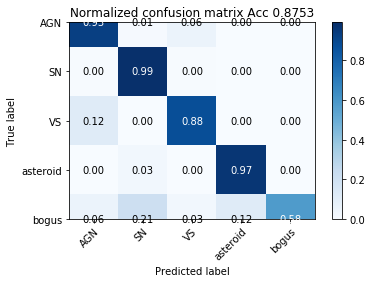

Confusion matrix, without normalization Acc 0.8200
[[43  0  7  0  0]
 [ 2 42  0  5  1]
 [ 7  0 42  0  1]
 [ 0  1  0 48  1]
 [ 3 10  1  6 30]]


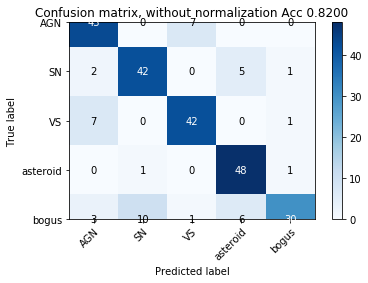



ENTROPY

Test Metrics: loss -0.489655, accuracy 0.820000
Normalized confusion matrix Acc 0.8689
[[9.30829228e-01 9.33908046e-03 5.88054187e-02 4.10509031e-04
  6.15763547e-04]
 [4.13650465e-03 9.91726991e-01 4.13650465e-03 0.00000000e+00
  0.00000000e+00]
 [1.17111525e-01 3.20711773e-03 8.76163873e-01 3.10366232e-03
  4.13821643e-04]
 [1.23749613e-03 2.78436630e-02 2.16561823e-03 9.65865732e-01
  2.88749098e-03]
 [5.97586669e-02 2.12411415e-01 2.93047309e-02 1.18559663e-01
  5.79965524e-01]]


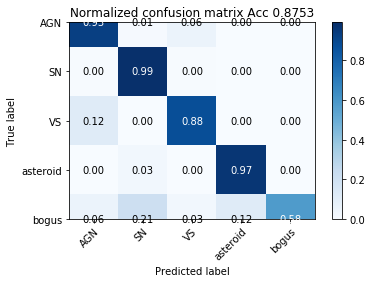

Confusion matrix, without normalization Acc 0.8200
[[43  0  7  0  0]
 [ 2 42  0  5  1]
 [ 7  0 42  0  1]
 [ 0  1  0 48  1]
 [ 3 10  1  6 30]]


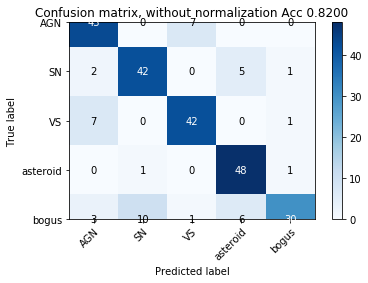

In [4]:
# load data
train_set, val_set, test_set = model_best_so_far._data_init()
# evaluate set
print("\nBEST SO FAR")
model_best_so_far.evaluate(test_set.data_array, test_set.data_label)
class_names = np.array(["AGN", "SN", "VS", "asteroid", "bogus"])
plot_confusion_matrix(
    train_set.data_label,
    model_best_so_far.predict(train_set.data_array),
    classes=class_names,
    normalize=True,
)
plot_confusion_matrix(
    test_set.data_label,
    model_best_so_far.predict(test_set.data_array),
    classes=class_names,
)
print("\n\nENTROPY")
model_entropy.evaluate(test_set.data_array, test_set.data_label)
plot_confusion_matrix(
    train_set.data_label,
    model_entropy.predict(train_set.data_array),
    classes=class_names,
    normalize=True,
)
plot_confusion_matrix(
    test_set.data_label, model_entropy.predict(test_set.data_array), classes=class_names
)
print("")

In [ ]:
# sample=10000
# model_entropy.predict_proba(train_set.data_array[sample])

In [ ]:
# model_best_so_far.predict_proba(train_set.data_array[sample])

In [ ]:
def get_correct_predictions_idxs(model: DeepHiTSNanNormCropStampModel, images, labels):
    predicted_classes = model.predict(images)
    return np.where(predicted_classes == labels)[0]


def get_incorrect_predictions_idxs(
    model: DeepHiTSNanNormCropStampModel, images, labels
):
    predicted_classes = model.predict(images)
    return np.where(predicted_classes != labels)[0]


def plot_conditioned_prediction_confidence_histograms(
    data_set: Dataset,
    model_best: DeepHiTSNanNormCropStampModel,
    model_entropy: DeepHiTSEntropyRegModel,
    bins,
    set_name="",
    correct_or_incorrect_pred="correct",
):
    labels_name = ["AGN", "SN", "VS", "asteroid", "bogus"]
    for label_value, label_name in enumerate(labels_name):
        label_idxs = np.where(data_set.data_label == label_value)[0]
        images = data_set.data_array[label_idxs]
        labels = data_set.data_label[label_idxs]

        if correct_or_incorrect_pred == "correct":
            conditioned_pred_idx_best = get_correct_predictions_idxs(
                model_best, images, labels
            )
            conditioned_pred_idx_entropy = get_correct_predictions_idxs(
                model_entropy, images, labels
            )
        if correct_or_incorrect_pred == "incorrect":
            conditioned_pred_idx_best = get_incorrect_predictions_idxs(
                model_best, images, labels
            )
            conditioned_pred_idx_entropy = get_incorrect_predictions_idxs(
                model_entropy, images, labels
            )

        if conditioned_pred_idx_best.shape[0] != 0:
            pred_prob_best = model_best.predict_proba(images[conditioned_pred_idx_best])
            plt.hist(
                np.max(pred_prob_best, axis=-1),
                bins,
                label="Vanilla",
                alpha=0.6,
                range=[0.2, 1],
            )

        if conditioned_pred_idx_entropy.shape[0] != 0:
            pred_prob_entropy = model_entropy.predict_proba(
                images[conditioned_pred_idx_entropy]
            )
            plt.hist(
                np.max(pred_prob_entropy, axis=-1),
                bins,
                label="Entropy Reg",
                alpha=0.6,
                range=[0.2, 1],
            )

        plt.legend()
        plt.title(
            "%s Output probability of %s %s predictions"
            % (set_name, correct_or_incorrect_pred, label_name)
        )
        plt.show()


plot_conditioned_prediction_confidence_histograms(
    test_set, model_best_so_far, model_entropy, bins=25, set_name="Test"
)

In [ ]:
plot_conditioned_prediction_confidence_histograms(
    train_set, model_best_so_far, model_entropy, bins=100, set_name="Train"
)

In [ ]:
plot_conditioned_prediction_confidence_histograms(
    test_set,
    model_best_so_far,
    model_entropy,
    bins=20,
    set_name="Test",
    correct_or_incorrect_pred="incorrect",
)

In [ ]:
plot_conditioned_prediction_confidence_histograms(
    train_set,
    model_best_so_far,
    model_entropy,
    bins=30,
    set_name="Train",
    correct_or_incorrect_pred="incorrect",
)

In [ ]:
def get_n_best_pred(y_true, y_probs, y_pred, n_best):
    # print(y_true)
    # print(y_probs)
    # print(y_pred)
    n_best_predictions = []
    for best_i in range(n_best):
        sorted_probs = np.sort(y_probs, axis=-1)
        best_probs_value = sorted_probs[..., -1 - best_i]
        # print(best_probs_value)
        prediction_best_i = []
        for prob_i in range(y_probs.shape[0]):
            label_i = np.where(y_probs[prob_i] == best_probs_value[prob_i])[0][0]
            prediction_best_i.append(label_i)
        prediction_best_i = np.array(prediction_best_i)
        # print(prediction_best_i)
        n_best_predictions.append(prediction_best_i == y_true)
    n_best_predictions = np.array(n_best_predictions)
    # print(n_best_predictions.shape)
    correct_among_n_best = np.bitwise_or.reduce(n_best_predictions, axis=0)
    # print(correct_among_n_best)
    predictions_best_1 = y_pred
    predictions_changing_best_n = predictions_best_1[:]
    predictions_changing_best_n[correct_among_n_best] = y_true[correct_among_n_best]
    return predictions_changing_best_n


def get_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)


samples = test_set.data_label.shape[0]
pred_1 = get_n_best_pred(
    test_set.data_label[:samples],
    model_best_so_far.predict_proba(test_set.data_array[:samples]),
    model_best_so_far.predict(test_set.data_array[:samples]),
    1,
)
pred_2 = get_n_best_pred(
    test_set.data_label[:samples],
    model_best_so_far.predict_proba(test_set.data_array[:samples]),
    model_best_so_far.predict(test_set.data_array[:samples]),
    2,
)
# print(pred_1)
# print(pred_2)

print("acc1 ", get_accuracy(test_set.data_label[:samples], pred_1))
print("acc2 ", get_accuracy(test_set.data_label[:samples], pred_2))

In [ ]:
samples = test_set.data_label.shape[0]
pred_1_entropy = get_n_best_pred(
    test_set.data_label[:samples],
    model_entropy.predict_proba(test_set.data_array[:samples]),
    model_entropy.predict(test_set.data_array[:samples]),
    1,
)
pred_2_entropy = get_n_best_pred(
    test_set.data_label[:samples],
    model_entropy.predict_proba(test_set.data_array[:samples]),
    model_entropy.predict(test_set.data_array[:samples]),
    2,
)
# print(pred_1)
# print(pred_2)

print("acc1 ", get_accuracy(test_set.data_label[:samples], pred_1_entropy))
print("acc2 ", get_accuracy(test_set.data_label[:samples], pred_2_entropy))

In [ ]:
print("BEST")
class_names = np.array(["AGN", "SN", "VS", "asteroid", "bogus"])
plot_confusion_matrix(test_set.data_label, pred_1, classes=class_names)
plot_confusion_matrix(test_set.data_label, pred_2, classes=class_names)
print("\n\nENTROPY")
plot_confusion_matrix(test_set.data_label, pred_1_entropy, classes=class_names)
plot_confusion_matrix(test_set.data_label, pred_2_entropy, classes=class_names)
print("")

In [ ]:
# TRAIN

In [ ]:
samples = train_set.data_label.shape[0]
pred_1 = get_n_best_pred(
    train_set.data_label[:samples],
    model_best_so_far.predict_proba(train_set.data_array[:samples]),
    model_best_so_far.predict(train_set.data_array[:samples]),
    1,
)
pred_2 = get_n_best_pred(
    train_set.data_label[:samples],
    model_best_so_far.predict_proba(train_set.data_array[:samples]),
    model_best_so_far.predict(train_set.data_array[:samples]),
    2,
)
# print(pred_1)
# print(pred_2)

print("acc1 ", get_accuracy(train_set.data_label[:samples], pred_1))
print("acc2 ", get_accuracy(train_set.data_label[:samples], pred_2))

In [ ]:
samples = train_set.data_label.shape[0]
pred_1_entropy = get_n_best_pred(
    train_set.data_label[:samples],
    model_entropy.predict_proba(train_set.data_array[:samples]),
    model_entropy.predict(train_set.data_array[:samples]),
    1,
)
pred_2_entropy = get_n_best_pred(
    train_set.data_label[:samples],
    model_entropy.predict_proba(train_set.data_array[:samples]),
    model_entropy.predict(train_set.data_array[:samples]),
    2,
)
# print(pred_1)
# print(pred_2)

print("acc1 ", get_accuracy(train_set.data_label[:samples], pred_1_entropy))
print("acc2 ", get_accuracy(train_set.data_label[:samples], pred_2_entropy))

In [ ]:
print("BEST")
class_names = np.array(["AGN", "SN", "VS", "asteroid", "bogus"])
plot_confusion_matrix(train_set.data_label, pred_1, classes=class_names, normalize=True)
plot_confusion_matrix(train_set.data_label, pred_2, classes=class_names, normalize=True)
print("\n\nENTROPY")
plot_confusion_matrix(
    train_set.data_label, pred_1_entropy, classes=class_names, normalize=True
)
plot_confusion_matrix(
    train_set.data_label, pred_2_entropy, classes=class_names, normalize=True
)
print("")